# Filtration and FFT

Signal filtration with Butterworth filters using Python and Fast Fourier Transformation will be presented in this notebook.

Signal processing will be performed on artificially generated signals.

Sine waves will be generated according to the formula below:
\begin{equation*}
y(t) = A*sin(2*\pi*f*t+\varphi)
\end{equation*}

Import basic modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Import signal analysis module

Via the https protocol, directly from github (similar manner to JavaScript).

In [2]:
import os
import imp
import requests

# %matplotlib widget

def import_cdn(uri, name=None):
    if not name:
        name = os.path.basename(uri).lower().rstrip('.py')

    r = requests.get(uri)
    r.raise_for_status()

    codeobj = compile(r.content, uri, 'exec')
    module = imp.new_module(name)
    exec (codeobj, module.__dict__)
    return module

ag = import_cdn("https://raw.githubusercontent.com/mjukiewicz/asEEG/master/aseegg.py")

Generate and combine sine waves.

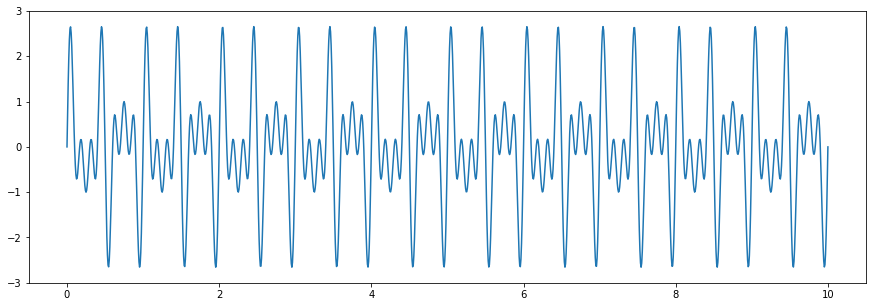

In [3]:
f1 = 5
f2 = 7
f3 = 3

sec = 10
Fs = 128

plt.rcParams['figure.figsize'] = [15, 5]

t = np.linspace(0, sec, Fs * sec)
signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)
plt.ylim(-3, 3)
plt.plot(t, signal)

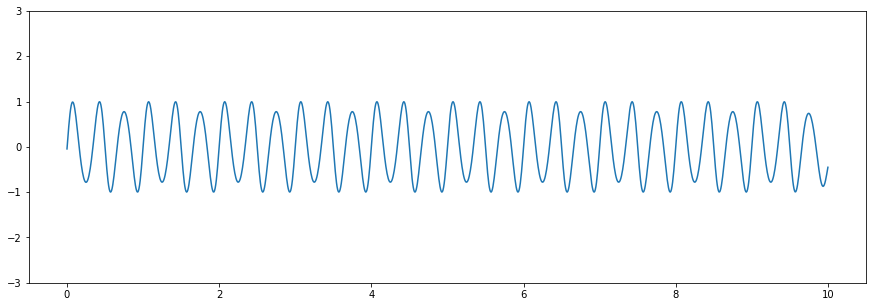

In [4]:
filtered = ag.dolnoprzepustowy(signal, Fs, 4)
plt.ylim(-3, 3)
plt.plot(t, filtered)

plt.show()

(0, 10)

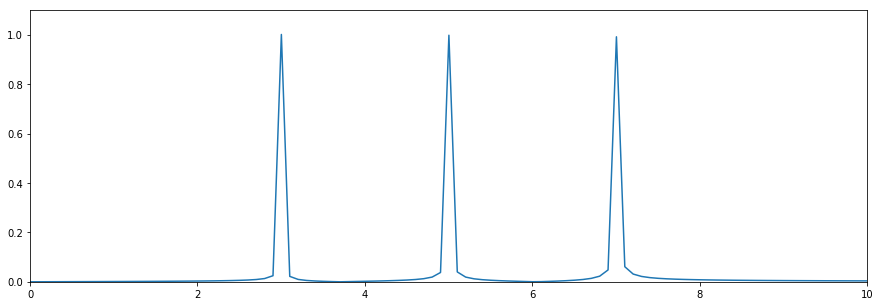

In [5]:
f = np.linspace(0, Fs, sec*Fs)
transformed = ag.FFT(signal)
 
plt.plot(f, transformed)
plt.ylim(0, 1.1)
plt.xlim(0, 10)

(0, 10)

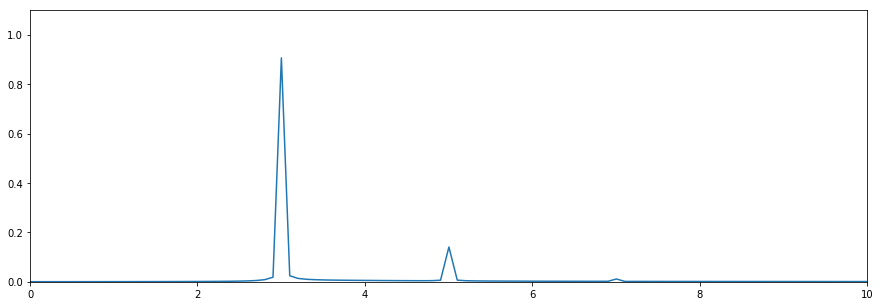

In [6]:
f = np.linspace(0, Fs, sec*Fs)
transformed = ag.FFT(filtered)
 
plt.plot(f, transformed)
plt.ylim(0, 1.1)
plt.xlim(0, 10)

### Additional material

Dependency between frequency and number of occurences:

\begin{equation*}
f =\frac{n}{t}
\end{equation*}

Or in other words:

\begin{equation*}
Hz =\frac{number\ of\ occurences}{second}
\end{equation*}

verbatim: _frequency in herz are number of occurences per second_

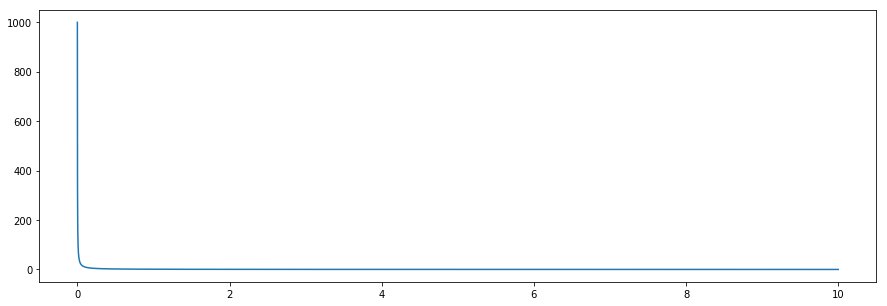

In [7]:
# From 1 ms (0.001 s) to 10 seconds, every 1 ms.
time = np.arange(0.001, 10, 0.001)
herz = 1/time
plt.plot(time, herz)